# Imports

In [1]:
import pandas as pd
for i in range(1,6):
    vars()['df_{}'.format(i)] = pd.read_csv('views_2019\involved_parts\involved_parts_{}.csv'.format(i))
    
dfs = [df_1, df_2, df_3, df_4, df_5]
df = pd.concat([dfi for dfi in dfs])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (44,68,148,157) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (148) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (36,38,40,42,44,68,148) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (44,68,80,148,157) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivit

In [8]:
for col in df.columns:
    print(col)

accident_id
provider_and_id
provider_code
file_type_police
involved_type
involved_type_hebrew
license_acquiring_date
age_group
age_group_hebrew
sex
sex_hebrew
involve_vehicle_type
involve_vehicle_type_hebrew
safety_measures
safety_measures_hebrew
involve_yishuv_symbol
involve_yishuv_name
injury_severity
injury_severity_hebrew
injured_type
injured_type_hebrew
injured_position
injured_position_hebrew
population_type
population_type_hebrew
involve_home_region
involve_home_region_hebrew
involve_home_district
involve_home_district_hebrew
involve_home_natural_area
involve_home_natural_area_hebrew
involve_home_municipal_status
involve_home_municipal_status_hebrew
involve_home_yishuv_shape
involve_home_yishuv_shape_hebrew
hospital_time
hospital_time_hebrew
medical_type
medical_type_hebrew
release_dest
release_dest_hebrew
safety_measures_use
safety_measures_use_hebrew
late_deceased
late_deceased_hebrew
car_id
involve_id
accident_year
accident_month
provider_code_hebrew
accident_timestamp
accide

In [63]:
llist = df.loc[df['road1'] == 77]['road_segment_number'].unique()
sorted(llist)

[1.0, 2.0, 10.0, 20.0, 30.0, 35.0, nan]

In [48]:

df.loc[df['road_segment_id'] == 770010][:3][['road_segment_number', 'road_segment_id', 'road_segment_name' ,'road1','road2','accident_hour_raw_hebrew', 'accident_severity', 'accident_severity_hebrew']] 
#'accident_hour','accident_minute', 'accident_year','accident_month']]

,road_segment_number,road_segment_id,road_segment_name,road1,road2,accident_hour_raw_hebrew,accident_severity,accident_severity_hebrew
627,10.0,770010.0,מחלף בית רימון - מחלף גולני,77.0,754.0,NaN,2,קשה
9596,10.0,770010.0,מחלף בית רימון - מחלף גולני,77.0,754.0,NaN,2,קשה
13931,10.0,770010.0,מחלף בית רימון - מחלף גולני,77.0,0.0,00:00-00:59,3,קלה


# All accidents 

In [53]:
from collections import defaultdict
years = sorted(df['accident_year'].unique(), reverse=True)
months = range(1,13,1)

months_dict = {curr_m: 0 for curr_m in months}
accidents = defaultdict(dict)
for year in years: 
    accidents[year] = months_dict.copy()
        
severities = range(1,4)

In [58]:
acclist = []
for i in range(3):
    acclist.append([])
for year in years:
    for month in months:
#         accidents[year][month] = df.loc[(df['road_segment_number'] == 90) & (df['accident_year'] == year) & (df['accident_month'] == month)].size
#         acclist.append(accidents[year][month])
        for sev in severities:
            acclist[sev-1].append(df.loc[(df['road1'] == 77) & (df['accident_year'] == year) & (df['accident_month'] == month) & (df['accident_severity'] == sev)].size)

In [56]:
acclist = []
for i in range(3):
    acclist.append([])
for year in years:
     for sev in severities:
        acclist[sev-1].append(df.loc[(df['road1'] == 90) & (df['accident_year'] == year)].size)

<BarContainer object of 144 artists>

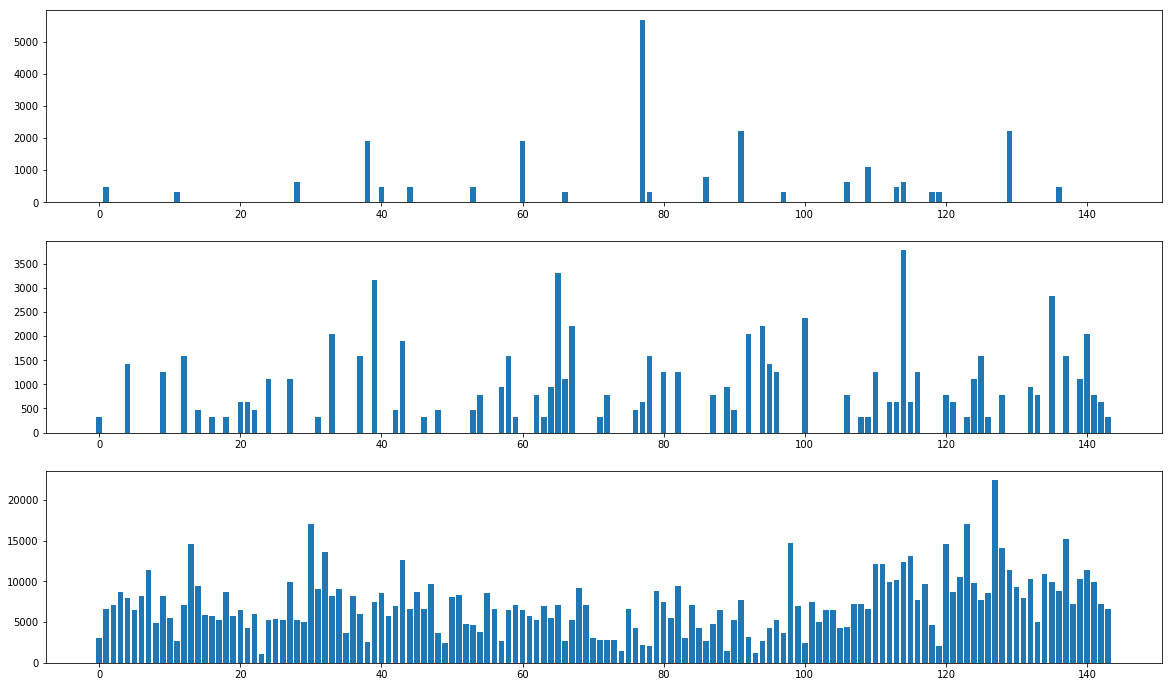

In [59]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20, 12))
ax1=plt.subplot(3, 1, 1)
ax2=plt.subplot(3, 1, 2)
ax3=plt.subplot(3, 1, 3)

ax1.bar(np.arange(len(acclist[0])),acclist[0])
ax2.bar(np.arange(len(acclist[1])),acclist[1])
ax3.bar(np.arange(len(acclist[2])),acclist[2])

<BarContainer object of 144 artists>

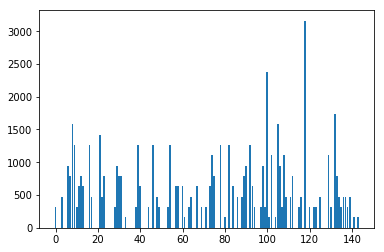

In [19]:
matplotlib.pyplot.bar(np.arange(len(acclist[1])),acclist[1])

<BarContainer object of 144 artists>

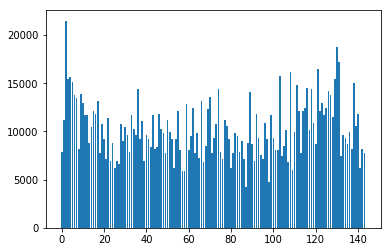

In [20]:
matplotlib.pyplot.bar(np.arange(len(acclist[2])),acclist[2])

In [ ]:
!conda install -c conda-forge folium

In [2]:
import folium

m = folium.Map(location=[32.09, 34.78], zoom_start=15)

display(m)

In [29]:
df.iloc[:3,0:20]


,accident_id,provider_and_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,sex_hebrew,involve_vehicle_type,involve_vehicle_type_hebrew,safety_measures,safety_measures_hebrew,involve_yishuv_symbol,involve_yishuv_name,injury_severity,injury_severity_hebrew,injured_type
0,2010034003,12010034003,1,NaN,1,נהג,1998,7,30-34,1.0,זכר,11.0,אוטובוס,5,לא ידוע,7100,אשקלון,0,NaN,0
1,2010025646,12010025646,1,NaN,2,נהג נפגע,2003,6,25-29,1.0,זכר,10.0,"אופנוע 126 עד 400 סמ""ק",2,חבש קסדת מגן (רק לאופנוע),2650,רמת השרון,3,פצוע קל,4
2,2010021723,12010021723,1,NaN,3,נפגע,0,10,45-49,2.0,נקבה,1.0,רכב נוסעים פרטי,5,לא ידוע,8400,רחובות,3,פצוע קל,3


In [15]:
df.iloc[:3,20:40]

,involve_vehicle_type,involve_vehicle_type_hebrew,safety_measures,safety_measures_hebrew,involve_yishuv_symbol,involve_yishuv_name,injury_severity,injury_severity_hebrew,injured_type
0,11.0,אוטובוס,5,לא ידוע,7100,אשקלון,0,NaN,0
1,10.0,"אופנוע 126 עד 400 סמ""ק",2,חבש קסדת מגן (רק לאופנוע),2650,רמת השרון,3,פצוע קל,4
2,1.0,רכב נוסעים פרטי,5,לא ידוע,8400,רחובות,3,פצוע קל,3


In [18]:
df.iloc[:3,40:60]

,injured_type_hebrew,injured_position,injured_position_hebrew,population_type,population_type_hebrew,involve_home_region,involve_home_region_hebrew,involve_home_district,involve_home_district_hebrew,involve_home_natural_area
0,NaN,8,לא ידוע,1,יהודים,6.0,הדרום,61,אשקלון,614.0
1,נהג - אופנוע,1,ישב ברכב במושב קדמי,1,יהודים,5.0,תל אביב,51,תל אביב,511.0
2,נוסע - רכב בעל 4 גלגלים ויותר,8,לא ידוע,1,יהודים,4.0,המרכז,44,רחובות,441.0


In [19]:
df.iloc[:3,60:80]

,involve_home_natural_area_hebrew,involve_home_municipal_status,involve_home_municipal_status_hebrew,involve_home_yishuv_shape,involve_home_yishuv_shape_hebrew,hospital_time,hospital_time_hebrew,medical_type,medical_type_hebrew,release_dest
0,אזור אשקלון,0.0,עירייה,14.0,"100,000-199,999-תושב, יישוב יהודי",NaN,NaN,NaN,NaN,NaN
1,אזור תל אביב,0.0,עירייה,16.0,"20,000-49,999-תושב, יישוב יהודי",NaN,NaN,NaN,NaN,NaN
2,אזור רחובות,0.0,עירייה,14.0,"100,000-199,999-תושב, יישוב יהודי",NaN,NaN,NaN,NaN,NaN


In [21]:
df.iloc[:3,80:100]

,release_dest_hebrew,safety_measures_use,safety_measures_use_hebrew,late_deceased,late_deceased_hebrew,car_id,involve_id,accident_year,accident_month,provider_code_hebrew
0,NaN,NaN,NaN,NaN,NaN,1,2,2010,1,הלשכה המרכזית לסטטיסטיקה - סוג תיק 1
1,NaN,NaN,NaN,NaN,NaN,1,2,2010,5,הלשכה המרכזית לסטטיסטיקה - סוג תיק 1
2,NaN,NaN,NaN,NaN,NaN,1,2,2010,7,הלשכה המרכזית לסטטיסטיקה - סוג תיק 1


In [23]:
df.iloc[:3,100:120]

,accident_timestamp,accident_type,accident_type_hebrew,accident_severity,accident_severity_hebrew,location_accuracy,location_accuracy_hebrew,road_type,road_type_hebrew,road_shape
0,2010-01-31 13:00:00,1,פגיעה בהולך רגל,3,קלה,3,מרכז דרך,2,עירונית לא בצומת,9
1,2010-05-28 11:15:00,2,התנגשות חזית אל צד,3,קלה,3,מרכז דרך,2,עירונית לא בצומת,9
2,2010-07-06 10:15:00,2,התנגשות חזית אל צד,3,קלה,1,עיגון מדויק,1,עירונית בצומת,8


In [26]:
df.iloc[:3,120:140]

,road_shape_hebrew,day_type,day_type_hebrew,police_unit,police_unit_hebrew,one_lane,one_lane_hebrew,multi_lane,multi_lane_hebrew,speed_limit
0,אחר,4,יום אחר,52,מרחב שפלה,0,NaN,2,מיפרדה עם גדר בטיחות,1
1,אחר,4,יום אחר,51,מרחב השרון,9,לא ידוע מס מסלולים,0,NaN,0
2,כביש ישר / צומת,4,יום אחר,52,מרחב שפלה,9,לא ידוע מס מסלולים,0,NaN,1


In [30]:
df.iloc[:3,140:160]

,x,y,engine_volume,engine_volume_hebrew,manufacturing_year,driving_directions,driving_directions_hebrew,vehicle_status,vehicle_status_hebrew,vehicle_attribution,vehicle_attribution_hebrew,seats,total_weight,total_weight_hebrew,vehicle_vehicle_type,vehicle_vehicle_type_hebrew,vehicle_damage,vehicle_damage_hebrew
0,182083.0,644642.0,13.0,10001+,2008.0,0.0,לא ידוע,0.0,NaN,1.0,ישראלי,53.0,11.0,16.0-19.0,11.0,אוטובוס,NaN,NaN
1,189687.0,675706.0,3.0,251-500,2009.0,1298.0,מערב,0.0,NaN,1.0,ישראלי,1.0,NaN,NaN,10.0,"אופנוע 126 עד 400 סמ""ק",NaN,NaN
2,183401.0,644012.0,9.0,2001-3000,2002.0,0.0,לא ידוע,0.0,NaN,1.0,ישראלי,99.0,NaN,NaN,1.0,רכב נוסעים פרטי,NaN,NaN


In [28]:
df.iloc[:3,85:100]

,road_object,road_object_hebrew,object_distance,object_distance_hebrew,didnt_cross,didnt_cross_hebrew,cross_mode,cross_mode_hebrew,cross_location,cross_location_hebrew,cross_direction,cross_direction_hebrew,road1,road2,km
0,9,לא ידוע,9,לא ידוע,9,לא ידוע,0,NaN,0,NaN,9,לא ידוע,NaN,NaN,NaN
1,9,לא ידוע,9,לא ידוע,9,לא ידוע,0,NaN,0,NaN,9,לא ידוע,NaN,NaN,NaN
2,3,תמרור ושלט,2,1-3 מטר,9,לא ידוע,0,NaN,0,NaN,9,לא ידוע,NaN,NaN,NaN
